<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Practica 5: Introducción al análisis frecuencial de señales</font></b></h1>
                <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Stalyn Chingal Atis</font></h3>
    </div>
</div>

Señal análogica

Xa(t) = 5sin(2π(40)t)

Fs = 1000 Hz

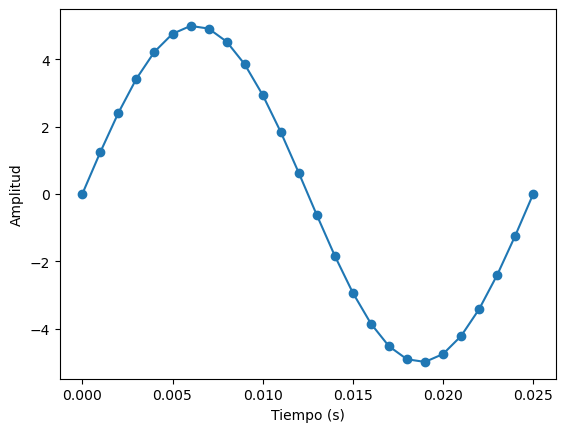

In [271]:
import matplotlib.pyplot as plt
from scipy.signal import welch
import scipy.io as sio
import numpy as np
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Se observa claramente que el periodo de la señal analógica o en tiempo continuo es 𝑇𝑝 = 0,025𝑠. Una manera alternativa de crear la señal 𝑥(𝑛) sería:

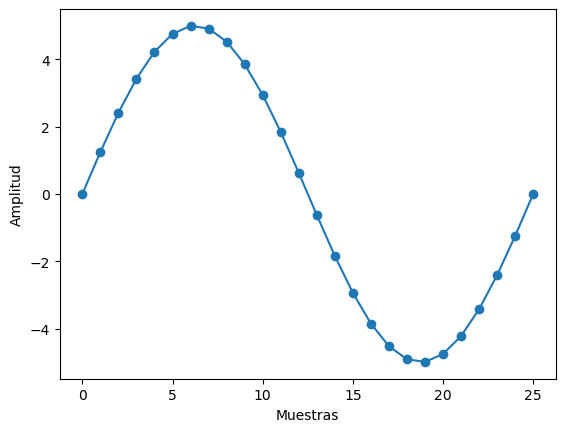

In [272]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


a. Compruebe que los valores de las primeras cinco muestras son los mismos.

In [273]:
muestras_x = x[:5] #Toma las primeras cinco muestras de la señal original
muestras_x1 = x1[:5] #toma las primers cinco muestras de la señal muestreada
if np.all(x[:5] == x1[:5]):
    print("Las primeras 5 muestras de las señales discretas son equivalentes.")
else:
    print("Las primeras 5 muestras de las señales discretas no son equivalentes.")

Las primeras 5 muestras de las señales discretas son equivalentes.


Otra manera de graficar las señales muestreadas es mediante la función stem:

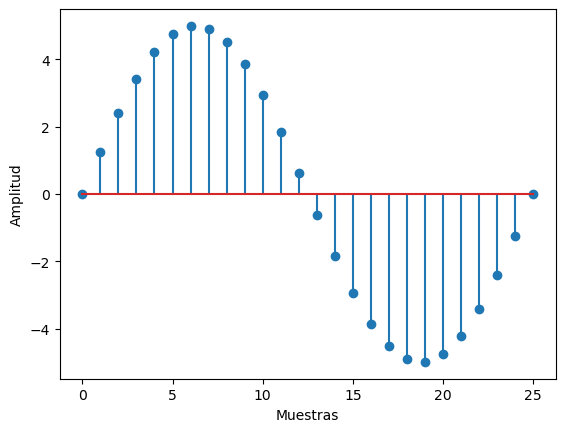

In [274]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


Energia y potencia en el dominio del tiempo

In [275]:
energia = sum(x**2) #Suma las magnitudes de la señal discreta al cuadrado.
potencia = energia / (len(t)-1)
rms = np.sqrt(potencia)

Para hallar la energía, así como la potencia media de la señal considerando 10 ciclos de la sinusoide (250ms):

In [276]:
t10 = np.arange(0,10*Tp+T,T) #Ahora se multiplica el periodo de la señal * 10 (# de ciclos). Ira hasta 0.25 s = 250ms, en pasos de 1ms
#Se tendran entonces 250 muestras.
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)
print(f'''
Energia x(n) = {energia10}
Potencia x(n) = {potencia10}
RMS x(n) = {rms10}''')


Energia x(n) = 3125.0000000000014
Potencia x(n) = 12.500000000000005
RMS x(n) = 3.535533905932738


In [277]:
energia_x= sum(x**2)
potencia_x = energia_x/(len(t)-1)
rms_x = np.sqrt(potencia_x)
print(f'''
Energia x(n) = {energia_x}
Potencia x(n) = {potencia_x}
RMS x(n) = {rms_x}''')


Energia x(n) = 312.50000000000006
Potencia x(n) = 12.500000000000002
RMS x(n) = 3.5355339059327378


b) La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

Sí, tanto la potencia de la señal de un ciclo como la señal de 10 ciclos son iguales. Esto se debe a que la potencia calcula la energía media por muestra, lo que significa que, aunque la señal se haya extendido a más ciclos (10 en este caso), la energía total aumenta , pero como la potencia es la energía promedio por muestra. , se mantiene constante.

**Análisis de Fourier en tiempo discreto**

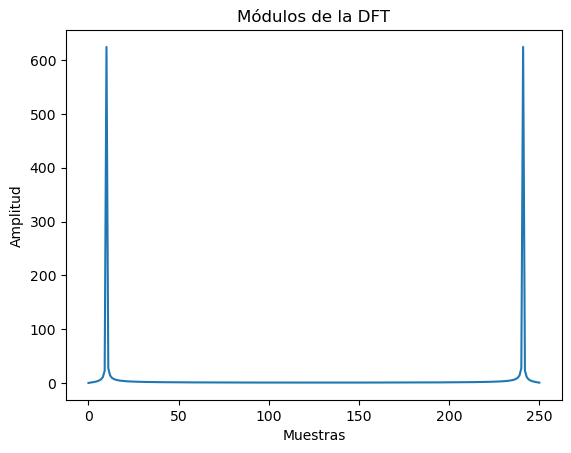

In [278]:
X10 = np.fft.fft(x10)
plt.plot(abs(X10))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

Relación de la DFT con las frecuencias F de tiempo continuo

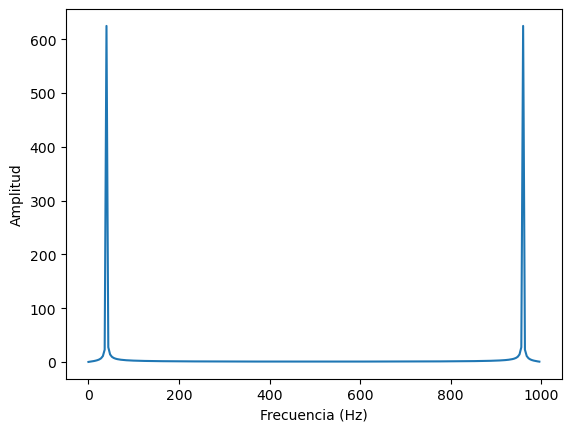

In [279]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

Frecuencia Nyquist

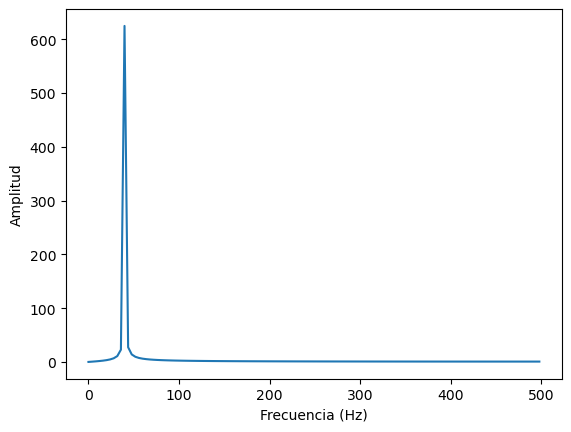

In [280]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

Se observa que la componente frecuencial se encuentra ubicada a 40 Hz.

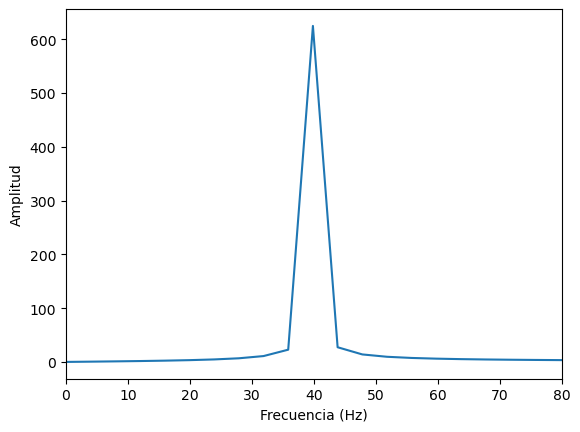

In [281]:
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()

<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Aplicación</font></b></h1>
    </div>
</div>

4.1. Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

Para representar la señal, la frecuencia de muestreo mínima necesaria sería 320 Hz (correspondiente al doble de la Fmax = 160 Hz), cumpliendo con el teorema de muestreo de Nyquist-Shannon, que establece que una señal debe ser muestreada al menos al doble de su frecuencia máxima para garantizar su correcta reconstrucción sin pérdida de información. No obstante, al visualizarla se consideró que no representaba de manera apropiada la señal, por lo que se utilizó una frecuencia de muestreo de 3000 Hz con el fin de preservar su dinámica senoidal. En este caso se seleccionó una frecuencia de muestreo mayor para tener una representación más precisa.


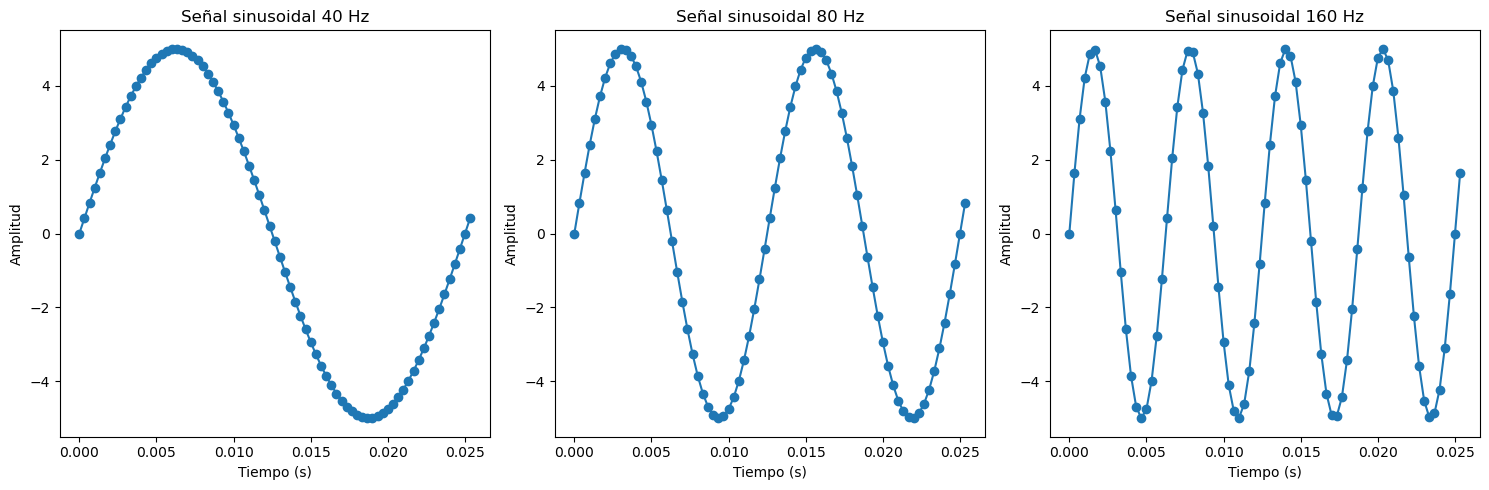

In [282]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
Fo = [40, 80, 160]  # Frecuencias
Tp = 1/min(Fo)      # Periodo de la señal, con la frecuencia fundamental (mínima)
Fs = 3000           # Frecuencia de muestreo
T = 1/Fs            # Periodo de muestreo

# Función para generar señales sinusoidales
def generasenal(Frecuencia, A, tiempo):
    return A * np.sin(2 * np.pi * Frecuencia * tiempo)

# Vector de tiempo
t = np.arange(0, Tp + T, T)  # Tiempo para un ciclo de la señal con duración de Tp más T
A = 5  # Amplitud de la señal
x = np.zeros(len(t))  # Inicialización del vector para la suma de señales

# Crear figura y subplots con 3 columnas y 1 fila
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 3 columnas, 1 fila

# Generar y graficar las señales para cada frecuencia en Fo
for idx, i in enumerate(Fo):
    senal = generasenal(i, A, t)  # Generar señal para cada frecuencia
    axes[idx].plot(t, senal, marker='o')
    axes[idx].set_title(f'Señal sinusoidal {i} Hz')
    axes[idx].set_xlabel('Tiempo (s)')
    axes[idx].set_ylabel('Amplitud')
    x += senal  # Sumar la señal al vector x

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con las 3 gráficas
plt.show()


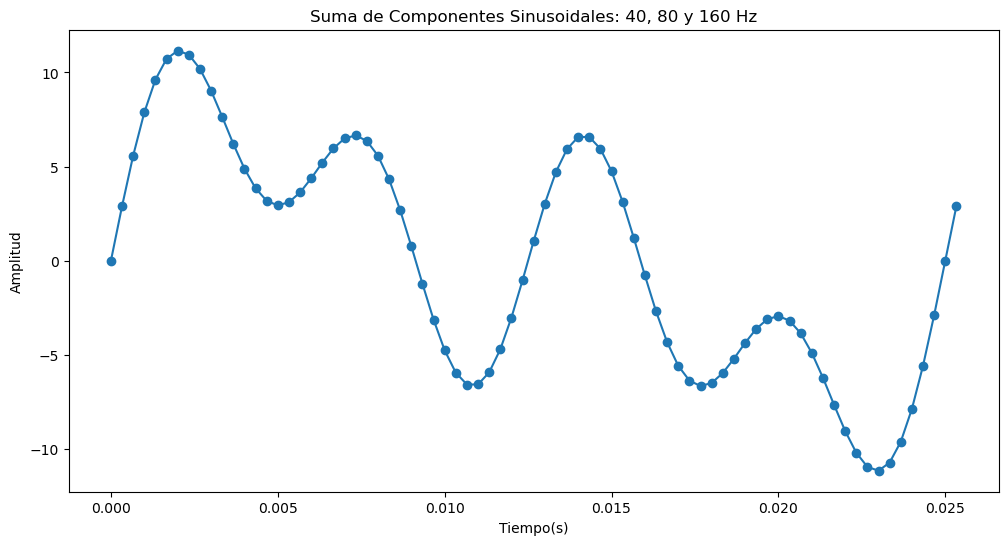

In [283]:
plt.figure(figsize=(12,6))
plt.plot(t,x,marker='o')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.title('Suma de Componentes Sinusoidales: 40, 80 y 160 Hz')
plt.show()

4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). (10%)

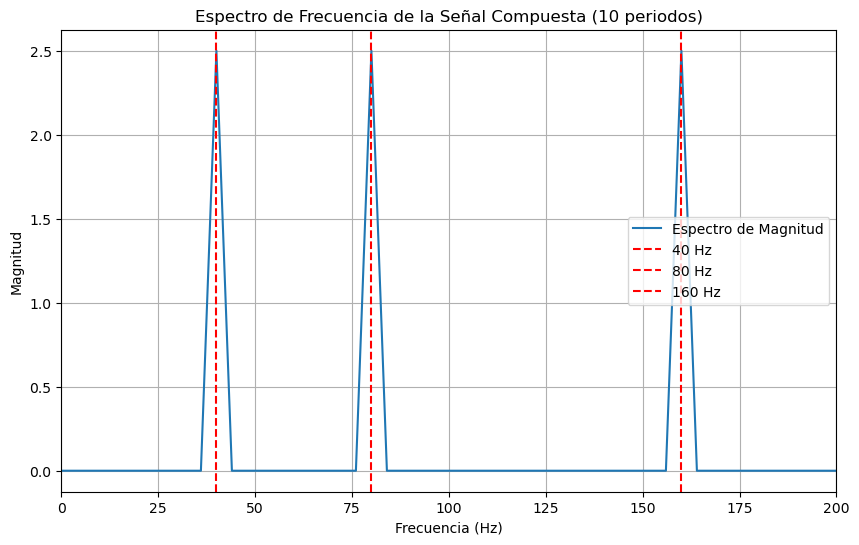

In [284]:
# Generar tiempo para 10 periodos de la frecuencia más baja
t = np.arange(0,0.025*10,1/Fs) 
x = np.zeros(len(t))  # Inicialización del vector para la suma de señales

# Generar la señal compuesta sumando las componentes sinusoidales
for frec in Fo:
    x += A * np.sin(2 * np.pi * frec * t)

# Aplicar la Transformada de Fourier (FFT) a la señal
X_fft = np.fft.fft(x) / len(x)  # Normalizamos la FFT dividiendo por la longitud de la señal
frecuencias = np.fft.fftfreq(len(x), T)  # Frecuencias correspondientes

# Tomar solo la parte positiva del espectro
X_fft_magnitude = np.abs(X_fft[:len(X_fft) // 2])  # Magnitud de la FFT
frecuencias_positivas = frecuencias[:len(frecuencias) // 2]  # Frecuencias positivas

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_positivas, X_fft_magnitude, label='Espectro de Magnitud')

# Identificar las frecuencias principales (40 Hz, 80 Hz, 160 Hz)
for frec in Fo:
    plt.axvline(x=frec, color='r', linestyle='--', label=f'{frec} Hz')

# Ajustes del gráfico
plt.title('Espectro de Frecuencia de la Señal Compuesta (10 periodos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 200)  # Limitar el eje X a 0-200 Hz para enfocarnos en las frecuencias importantes
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()

4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.Aplíquelo a la señal anterior. (10%)

La función que permite realizar el cálculo de la transformada inversa de Fourier en Python es np.fft.ifft(). Esta función toma una matriz de números complejos en el dominio de la frecuencia y lo transforma de vuelta al dominio del tiempo.[1]

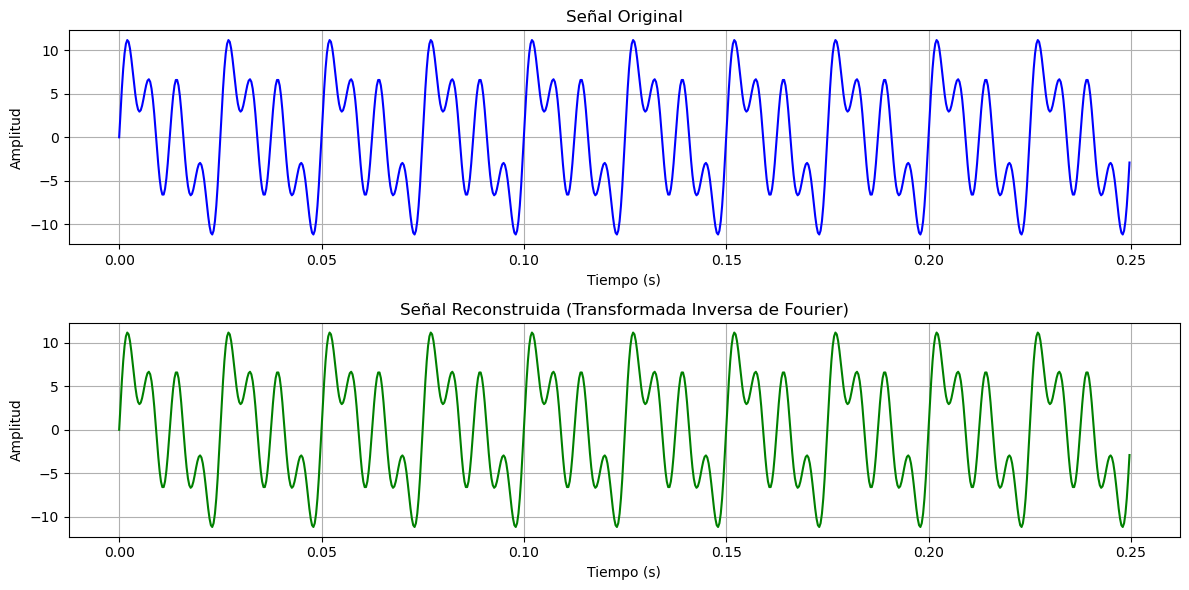

In [285]:
# Aplicar la Transformada Inversa de Fourier (IFFT) para recuperar la señal original
x_reconstructed = np.fft.ifft(X_fft * len(x))  # Multiplicamos por el tamaño para desnormalizar

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 6))

# Graficar la señal original
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Señal Original', color='b')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal reconstruida a partir de la FFT inversa
plt.subplot(2, 1, 2)
plt.plot(t, np.real(x_reconstructed), label='Señal Reconstruida', color='g')  # Usamos np.real() para obtener la parte real
plt.title('Señal Reconstruida (Transformada Inversa de Fourier)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Mostrar las dos gráficas
plt.tight_layout()
plt.show()


4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%)

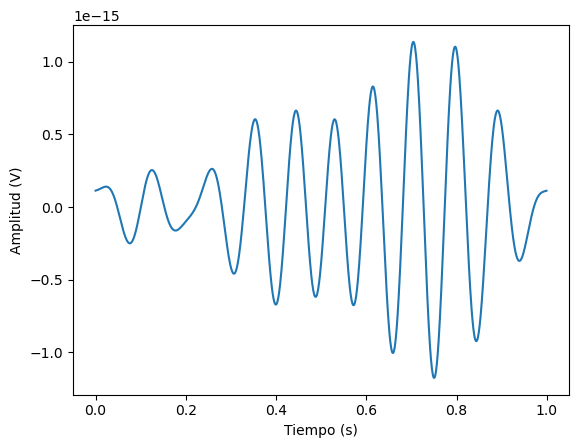

In [297]:
fs = 1000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # Tiempo de 1 segundo con pasos de 1/fs
x = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)  # Ejemplo de señal con dos frecuencias
# Transformada de Fourier de la señal original
F1 = np.fft.fft(x)

# Crear un array de frecuencias filtradas (inicialmente todas en cero)
F2 = np.zeros((len(F1)), dtype=complex)  # Asegúrate de que F2 sea complejo

# Filtrar las frecuencias entre los índices 9 y 13
F2[9:13] = F1[9:13]

# Transformada inversa de Fourier para reconstruir la señal filtrada
xr = np.fft.ifft(F2)

# Crear la figura para graficar la señal filtrada
fig = plt.figure()
ax = fig.add_subplot(111)

# Graficar la parte real de la señal reconstruida
ax.plot(t, np.real(xr))

# Etiquetas de los ejes
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)')

# Mostrar el gráfico
plt.show()

Para evidenciar el filtro se define una nueva funcion.

Un filtro se define como un proceso que permite o eliminar ciertos componentes de una señal, ya sea en el dominio del tiempo o en el dominio de la frecuencia. En este caso, estamos trabajando en el dominio de la frecuencia.
El codigo seleccionan un subconjunto de frecuencias del espectro de Fourier de la señal y las mantienen, eliminando el resto al asignar ceros a todas las otras posiciones en F2. Este proceso es equivalente a un filtro de paso de banda , que permite que solo las frecuencias en el rango de los índices 9 a 13 pasen y bloquee todas las demás.

4.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%)

In [287]:
#Primero, se carga el archivo "senecg.mat", el cual contiene la señal de ECG con una frecuencia de muestreo de 250 Hz.
archivo_ecg = sio.loadmat('senecg.mat')
signal_ecg = archivo_ecg['ECG'] #Extracción de la señal

#Se estima el numero de muestras de la señal ECG.
muestras=signal_ecg.size
print(f"La señal ECG contiene {int(muestras)} muestras.")

#Se estima la duración de la señal teniendo en cuenta una frecuencia de muestreo de 250 Hz.
duracion= signal_ecg.size/250
print(f"La duración de la señal ECG es de {int(duracion)} segundos.")

#Creación del vector de tiempo
time=np.arange(0, duracion,1/250)
signal_ecg = signal_ecg.flatten() # Se modifica la forma de la señal para que quede en una dimensión.
time.shape

La señal ECG contiene 1250 muestras.
La duración de la señal ECG es de 5 segundos.


(1250,)

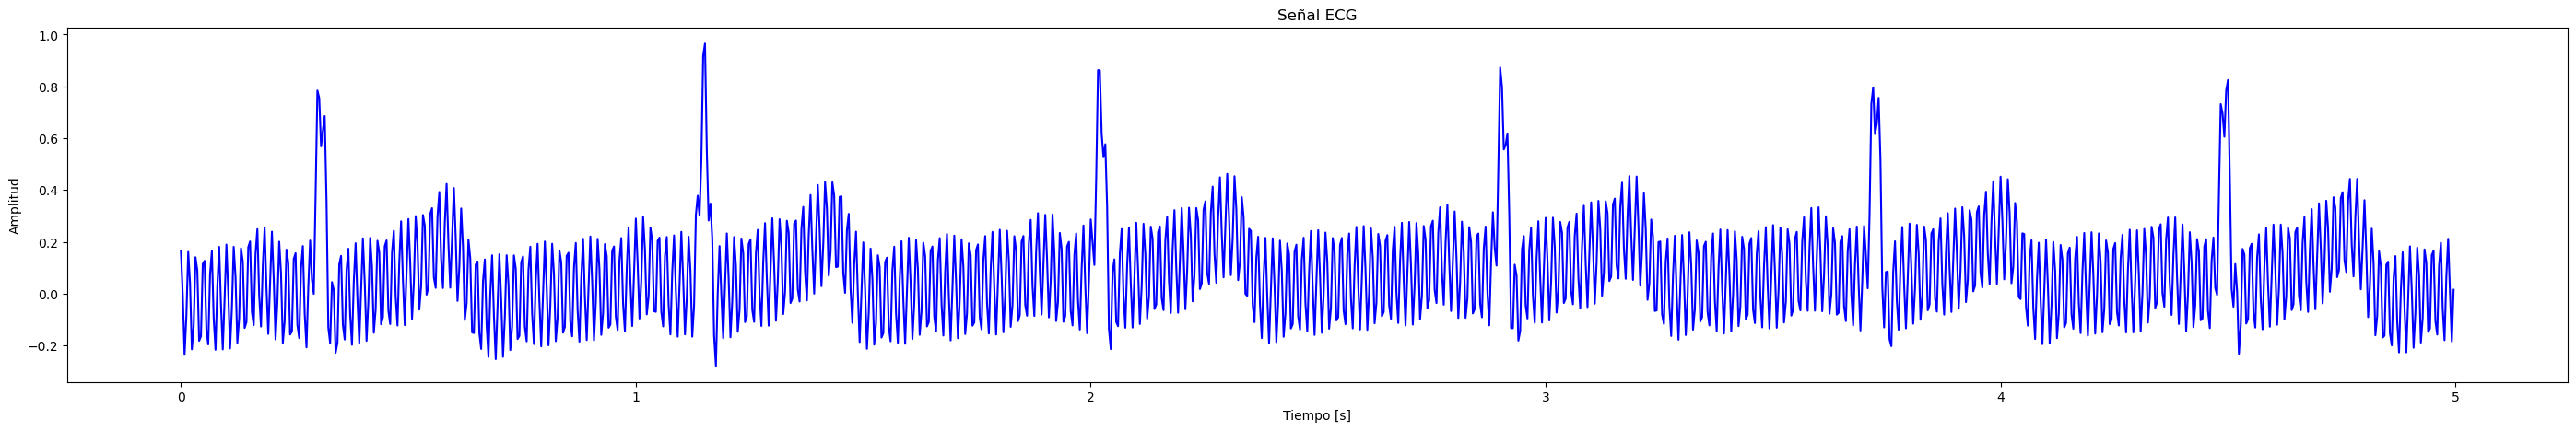

In [288]:
#Gráfico de la señal ECG
plt.figure(figsize=(35,5))
plt.title('Señal ECG')
plt.plot(time, signal_ecg, color='blue')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

La energia de la señal ECG es: 53.2689
La potencia media de la señal ECG: 0.0426
El valor cuadratico medio de la señal ECG: 0.2065


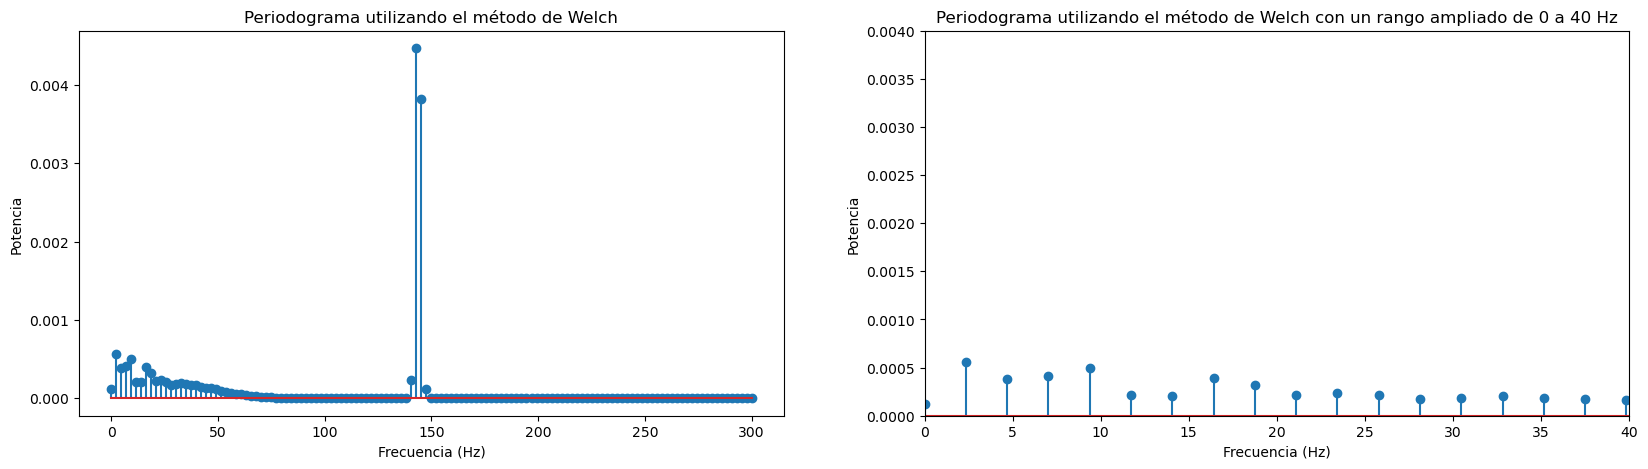

In [289]:
#Periodograma de Welch
energia = sum(signal_ecg**2)
potencia = energia/(len(time)-1)
rms = np.sqrt(potencia)
print(f"La energia de la señal ECG es: {energia:.4f}")
print(f"La potencia media de la señal ECG: {potencia:.4f}")
print(f"El valor cuadratico medio de la señal ECG: {rms:.4f}")

fs = 600 # Frecuencia de muestreo de la señal ECG
# Calcular la longitud de la señal
len_signalecg = len(signal_ecg)
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, len_signalecg)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, pxx = welch(signal_ecg, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch")
#plt.ylim([0, 0.002])
plt.subplot(1,2,2)
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch con un rango ampliado de 0 a 40 Hz")
plt.xlim([0,40])
plt.ylim([0,0.004])
plt.show()

En la gráfica del periodograma obtenido utilizando el método de Welch, se observan varios componentes de frecuencia predominantes por debajo de los 40 Hz, lo cual es coherente con lo que se espera de una señal de ECG. las frecuencias de ECG, como el complejo QRS contiene frecuencias entre 8 y 50 Hz, siendo las frecuencias alrededor de 20 Hz las más predominantes. En la gráfica, se observa actividad significativa en este rango, lo cual es consistente con la literatura sobre señales de ECG.
La onda T, que refleja la repolarización de los ventrículos, aparece principalmente en frecuencias bajas, de 0 a 10 Hz, lo cual también es visible en el periodograma ampliado a la derecha, donde hay picos de baja frecuencia.
La onda P, que corresponde a la despolarización de las aurículas, se asocia típicamente a frecuencias entre 5 y 30 Hz, lo cual también coincide con algunos de los picos observados en ese rango.
Tambien se observa un pico prominente en 60 Hz indica la presencia de interferencia de la red eléctrica, que es un artefacto común en la adquisición de señales biológicas. Esta interferencia suele deberse a fuentes de alimentación cercanas y puede distorsionar la señal ECG, por lo que es fundamental eliminarla para un análisis preciso.[2]

**Aplicar un filtro si se identifica ruido y comprobarlo**

Para eliminar señales no deseadas, se utiliza un filtro pasa banda planteado en el punto 2.5,con el fin de eliminar el ruido de alta y baja frecuencia, se establece un rango de frecuencia de 0.5 a 50 Hz, donde se encuentran las señales que representan el ECG.

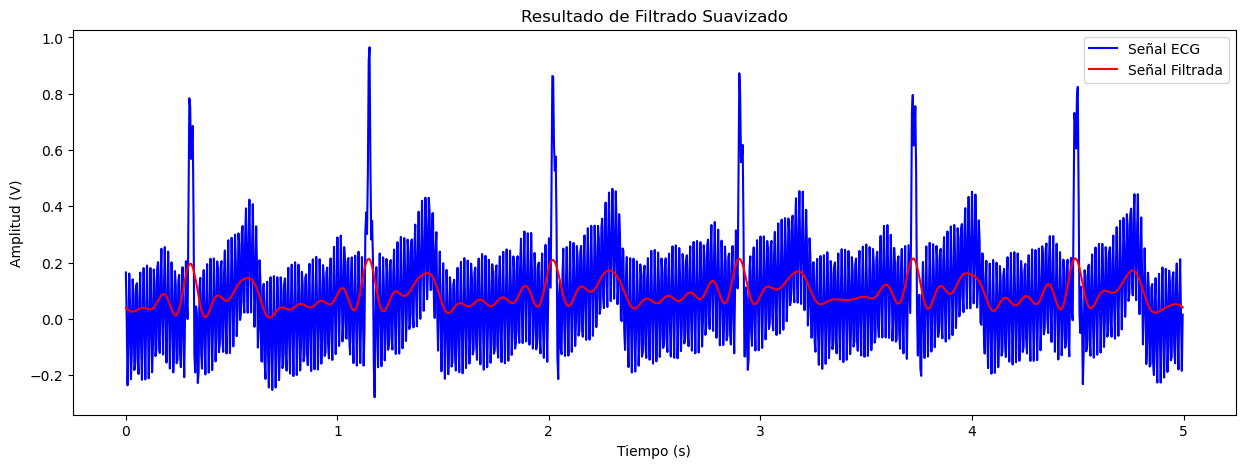

In [290]:
F1 = np.fft.fft(signal_ecg)

# Crear una ventana suave para suavizar el corte

hann_window = np.hanning(80)  # Ajusta el tamaño de la ventana
F2 = np.zeros_like(F1) # Crea un array de ceros que tiene exactamente las mismas dimensiones y tipo de datos que F1.
F2[0:40] = F1[0:40]
F2[40:50] = F1[40:50] * hann_window[40:50]
# Transformada inversa para obtener la señal filtrada
xr = np.fft.ifft(F2)
# Gráfica de la señal original y la señal filtrada
plt.figure(figsize=(15,5))
plt.plot(time, signal_ecg, label="Señal ECG", color='b')
plt.plot(time, np.real(xr), label="Señal Filtrada", color='r')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Resultado de Filtrado Suavizado')
plt.legend()
plt.show()

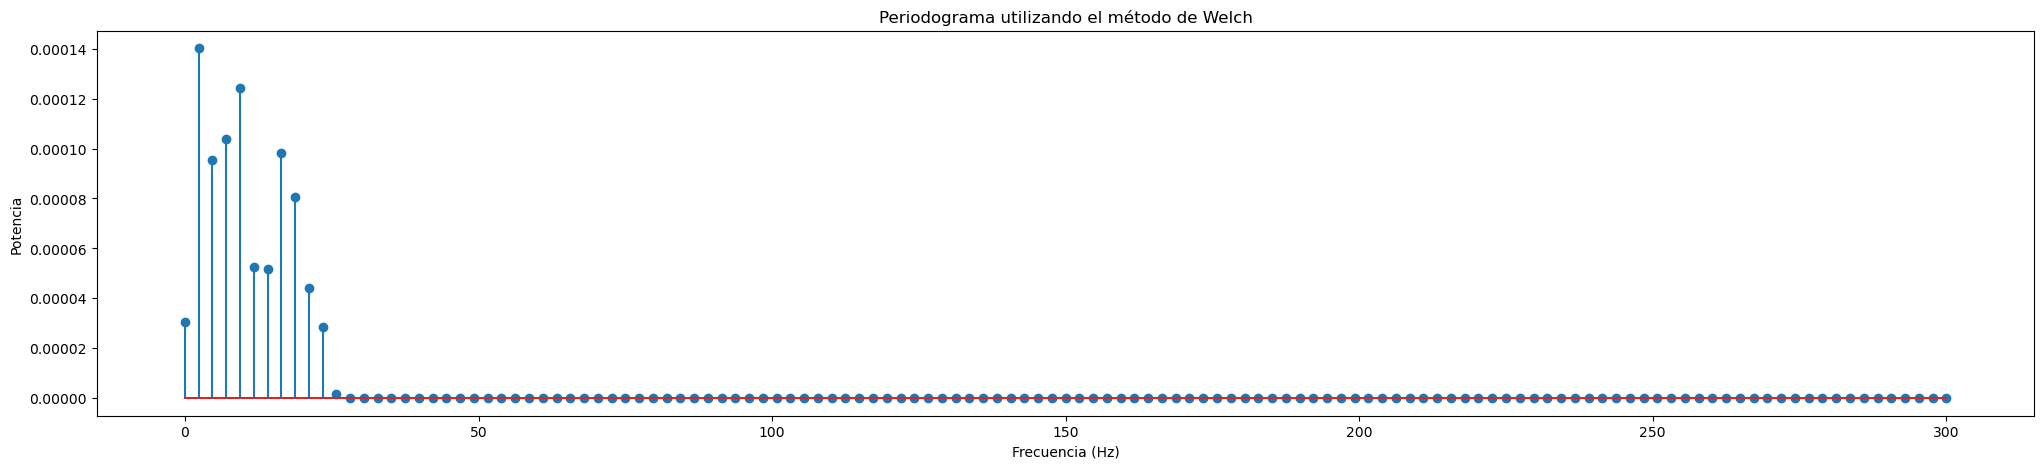

In [291]:
s = 600 # Frecuencia de muestreo de la señal ECG
# Calcular la longitud de la señal
len_signalecg = len(np.real(xr))
# Ajustar nperseg según la longitud de la señal
nperseg = min(256, len_signalecg)  # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, pxx = welch(np.real(xr), fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(25,5))
plt.stem(f, pxx)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.title("Periodograma utilizando el método de Welch")




plt.show()

Al comparar la señal de ECG filtrada con la señal original sin filtrar, es evidente que la filtración ha reducido de manera notable el ruido presente en la señal. Esta mejora se refleja claramente al revisar el periodograma, donde el pico destacado en 60 Hz, asociado a interferencias, ha sido completamente eliminado. No obstante, este proceso de filtrado también ha afectado negativamente algunos aspectos importantes de la señal, ya que ha reducido gran parte de su dinámica original. Esto indica que al eliminar las frecuencias más altas para reducir el ruido, también se suprimieron componentes clave del ECG, como el complejo QRS, la onda P y la onda T, que son fundamentales para el análisis de la señal. Por lo tanto, es crucial equilibrar el filtrado para reducir el ruido sin comprometer la información esencial que aporta la estructura completa del ECG.[3]

4.6 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana) (25%)


4.7 Conclusiones y referencias (10%)

**concluciones**
*  El muestreo de señales fisiológicas, que son de naturaleza analógica, es esencial para su procesamiento digital, y debe seguir el teorema de Nyquist para evitar el aliasing, garantizando que la frecuencia de muestreo sea al menos el doble de la frecuencia más alta de la señal. La Transformada Discreta de Fourier (DFT), calculada de manera eficiente mediante la FFT (Fast Fourier Transform), permite transformar las señales del dominio del tiempo al dominio de la frecuencia, facilitando la identificación de sus componentes. Normalmente, solo se analiza la mitad positiva del espectro debido a su simetría.
*  Al analizar la señal filtrada, se puede concluir que el filtro aplicado es altamente efectivo para eliminar el ruido de la red eléctrica, el cual se encuentra a una frecuencia de 60 Hz. Este tipo de ruido es común en el electrocardiograma (ECG), y puede interferir significativamente en la correcta interpretación de los datos. El éxito del filtrado se demuestra en la capacidad del filtro para eliminar este ruido sin comprometer la integridad de la señal original, lo que es fundamental en el análisis de señales fisiológicas.
Es importante destacar comprender las frecuencias características de un ECG normal para poder aplicar los filtros de manera adecuada. Esto permite eliminar eficazmente el ruido sin afectar los componentes esenciales de la señal, como las ondas P, QRS y T. Un conocimiento preciso de estas frecuencias garantiza que el filtrado preserve la integridad de la señal cardíaca, evitando la pérdida de información crítica para el análisis diagnóstico.
*  

**Referencias**

[1]Cortés, J. A., Medina, F. A., & Chaves, J. A. (2007). Del análisis de fourier a las wavelets análisis de fourier. Scientia et technica, 1(34). https://revistas.utp.edu.co/index.php/revistaciencia/article/view/5563

[2]Ochoa, A., Maciel, M., Estrada, F., Díaz, C., Félix, R., Alvarez, J., ... & de Investigaciones Biomédicas, C. U. (2010). Sistema de adquisición y procesamiento de señales electrocardiográficas. Sistemas Cibernetica e informatica, 7, 1-15. https://www.iiisci.org/journal/pdv/risci/pdfs/NK117CZ.pdf

[3] Lorenzo Romero, J. (2015). Análisis de señales electrocardiográficas usando técnicas de procesamiento digital. https://openaccess.uoc.edu/handle/10609/40186
